# AB Testing
This notebook accompanies a blog article, overviewing the basics of AB Testing.

## Imports and seed reproducability

In [15]:
from math import ceil
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
sns.set_theme()

In [2]:
np.random.seed(seed=42)

## Effect and Sample Size
Before gathering data, recommended to calculate effect and sample size.

### Effect Size

In [13]:
init_prop = 0.7
mde_prop = 0.75
effect_size = sm.stats.proportion_effectsize(init_prop, mde_prop)
print(f'For a change from {init_prop:.2f} to {mde_prop:.2f}, effect size is {effect_size:.2f}.')

For a change from 0.70 to 0.75, effect size is -0.11.


### Sample Size

In [18]:
sample_size = sm.stats.zt_ind_solve_power(effect_size=effect_size, nobs1=None, alpha=0.05, power=0.8)
print(f'{ceil(sample_size)} sample size required given power analysis and input parameters.')

1250 sample size required given power analysis and input parameters.


## Data Generation
For this example, we'll use dummy data to represent changes in a video game

In [5]:
data_generated_a = np.random.choice([0,1], size=1250, replace=True, p=[0.20, 0.8])
data_generated_b = np.random.choice([0,1], size=1250, replace=True, p=[0.3, 0.70])

In [6]:
df = pd.DataFrame({'medium': data_generated_a, 'hard': data_generated_b})

In [7]:
df.sum()

medium    980
hard      881
dtype: int64

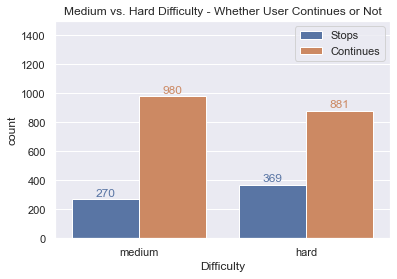

In [8]:
# Plot initial data and format
plot_df = df.melt()
plot_df.columns = ['Difficulty', 'User_Continues']
ax = sns.countplot(x='Difficulty', hue='User_Continues', data=plot_df)
ax.set_title("Medium vs. Hard Difficulty - Whether User Continues or Not")
ax.legend(['Stops', 'Continues'], loc='upper right')
ax.set_ybound(0, 1500)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0].mean()
    y=p.get_bbox().get_points()[1,1]
    ax.annotate(f'{y:.0f}', (x,y+5), ha='center', va='bottom', color=p.get_facecolor())

## Analyze Results

In [12]:
# Get z test requirements
medium_successes = df.loc[:, 'medium'].sum()
hard_successes = df.loc[:, 'hard'].sum()
medium_trials = df.loc[:, 'medium'].count()
hard_trials = df.loc[:, 'hard'].count()

print(f'Medium: {medium_successes} successes of {medium_trials} trials. Hard: {hard_successes} successes of {hard_trials} trials.')

Medium: 980 successes of 1250 trials. Hard: 881 successes of 1250 trials.


In [10]:
# Perform z test
z_stat, p_value = proportions_ztest(count=[medium_successes, hard_successes], nobs=[medium_trials, hard_trials])
print(f'z stat of {z_stat:.3f} and p value of {p_value:.4f}.')

z stat of 4.539 and p value of 0.0000.
